<a href="https://www.kaggle.com/code/noobhocai/natural-language-processing-with-disaster-tweets?scriptVersionId=138891596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #1D9BF0;
    border-radius: 15px;
    color: white;
    font-family: Verdana;
    font-size: 120%;
    letter-spacing: 1px;
    padding: 20px;
    text-align: center;">
<h1 style="font-size: 2rem;
     font-weight: bold;">
INTELLIGENCE DATA ANALYSIS
</h1>
<h3 style="font-size: 1.5rem;
     font-weight: bold;
     margin-top: 0;">
Final Project: Natural Language Processing with Disaster Tweets
</h3>
</div>
   

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120136 | Huỳnh Tuấn Nam |
| 20120138 | Lê Thành Nam |
| 20120140 | Nguyễn Đăng Nam |
| 20120146 | Nguyễn Thị Châu Ngọc |
| 20120158 | Trần Hoàng Anh Phi |

This notebook was created by: Trần Hoàng Anh Phi

<a id="TOC"></a>

<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white;background:#1D9BF0;border-radius: 15px 50px;
            font-family:Verdana;padding: 10px;font-size:150%;
            letter-spacing:1px' role="tab" aria-controls="home"><center>Table of Content</center></h1>
    
1. [Introduction](#introduction)
2. [Libraries](#library)
3. [Load Data](#loaddata)
4. [Exploratory Data Analysis](#eda)
    1. [Shape of Data](#shape_of_data)
    2. [Missing Values](#missing_values)
    3. [Duplicate Values](#duplicate)
    4. [Mixtypes Problem](#mixtypes)
    5. [Distribution](#distribution)
    6. [Keyword and Location](#keyword_and_location)
    7. [Text](#text)
5. [N-grams](#ngrams)
    1. [Create N-grams](#make-ngrams)
    2. [Unigrams](#unigrams)
    3. [Bigrams](#bigrams)
    4. [Trigrams](#trigrams)
6. [Preprocessing](#preprocessing)
7. [Build Model](#buildmodel)
    1. [LSTM](#lstm)
    2. [Bidirectional-LSTM](#bidirectional-LSTM)
    3. [DistilBERT](#distil-BERT)
8. [Evaluate](#evaluate)
9. [Submission](#submission)
10. [Reference](#reference)

<div id="introduction" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Introduction
    </h3>
</div>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div id="library" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Libraries
    </h3>
</div>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Import các thư viện cần thiết

In [1]:
import sys
sys.executable

'/opt/conda/bin/python'

In [2]:
import nltk
nltk.download('all', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import defaultdict
import re
import string
from tqdm.auto import tqdm
tqdm.pandas()
import pickle
import operator
import gensim

from transformers import AutoTokenizer
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel
from sklearn.metrics import *

from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

<div id="loaddata" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Load Data
    </h3>
</div>
    
<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Lấy đường dẫn của tập dữ liệu

In [4]:
sample_submission_path = '/kaggle/input/nlp-getting-started/sample_submission.csv'
test_path = '/kaggle/input/nlp-getting-started/test.csv'
train_path = '/kaggle/input/nlp-getting-started/train.csv'

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Đọc dữ liệu từ các đường dẫn và lưu vào dataframe 

In [5]:
sample_submission_df = pd.read_csv(sample_submission_path)
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)

<div id="eda" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Exploratory Data Analysis
    </h3>
</div>
    
<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

In [6]:
train_df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
test_df.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

<a id="shape_of_data"></a>
<h2 style='color:#0084b4;font-size:150%'>1. Shape of data</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Kiểm tra shape của tập train và tập test

In [8]:
print(f'The train set has {train_df.shape[0]} rows and {train_df.shape[1]} columns')
print(f'The test set has {test_df.shape[0]} rows and {test_df.shape[1]} columns')

The train set has 7613 rows and 5 columns
The test set has 3263 rows and 4 columns


<a id="missing_values"></a>
<h2 style='color:#0084b4;font-size:150%'>2. Missing values</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Có giá trị thiếu trong dữ liệu không? Nếu có thì số lượng giá trị thiếu như thế nào?

In [9]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

<a id="duplicate"></a>
<h2 style='color:#0084b4;font-size:150%'>3. Duplicate values</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

In [11]:
print(f'Duplicated values in train set: {train_df.duplicated().sum()}')
print(f'Duplicated values in test set: {test_df.duplicated().sum()}')

Duplicated values in train set: 0
Duplicated values in test set: 0


<a id="mixtypes"></a>
<h2 style='color:#0084b4;font-size:150%'>4. Mixtypes problem</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Kiểm tra mixtypes trong từng cột của mỗi dataframe

In [12]:
def check_mixtypes(df):
    for col in df.columns:
        unique_types = df[col].apply(type).unique()
        if len(unique_types) > 1:
            print(col, unique_types)

print('Train set: ')
check_mixtypes(train_df)
print('Test set: ')
check_mixtypes(test_df)

Train set: 
keyword [<class 'float'> <class 'str'>]
location [<class 'float'> <class 'str'>]
Test set: 
keyword [<class 'float'> <class 'str'>]
location [<class 'float'> <class 'str'>]


<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    &#9889; <mark>Observation:</mark>
   
- 2 cột `keyword` và `location` đều có mixtype giữa 2 kiểu dữ liệu __float__ và __string__

<a id="distribution"></a>
<h2 style='color:#0084b4;font-size:150%'>5. Distribution</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    Với mỗi cột dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [13]:
pd.set_option('display.max_colwidth', 100)
# pd.set_option('display.max_columns', None)
def create_df(df):
    not_numeric_cols = df.select_dtypes(exclude=np.number)
    value_ratios = [dict(df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
                    for col in not_numeric_cols.columns]
    missing_ratio = round(not_numeric_cols.isna().sum()*100/len(not_numeric_cols), 1)
    num_values = [df[col].nunique() for col in not_numeric_cols.columns]
    not_numeric_cols.reset_index(drop=True)
    my_index = ['missing_ratio', 'num_values', 'value_ratios']
    cat_col_info_df = pd.DataFrame(np.array([missing_ratio, num_values, value_ratios]),index=my_index, columns=not_numeric_cols.columns)
    return cat_col_info_df

In [14]:
cat_col_info_df_1 = create_df(train_df)
cat_col_info_df_1

keyword  \
missing_ratio                                                                                                  0.8   
num_values                                                                                                     221   
value_ratios   {'fatalities': '0.6%', 'deluge': '0.6%', 'armageddon': '0.6%', 'sinking': '0.5%', 'damage': '0.5...   

                                                                                                          location  \
missing_ratio                                                                                                 33.3   
num_values                                                                                                    3341   
value_ratios   {'USA': '2.0%', 'New York': '1.4%', 'United States': '1.0%', 'London': '0.9%', 'Canada': '0.6%',...   

                                                                                                              text  
missing_ratio                                                                                                  0.0  
num_values                                                                                                    7503  
value_ratios   {'11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been char...

In [15]:
cat_col_info_df_2 = create_df(test_df)
cat_col_info_df_2

keyword  \
missing_ratio                                                                                                  0.8   
num_values                                                                                                     221   
value_ratios   {'deluged': '0.7%', 'demolished': '0.7%', 'rubble': '0.7%', 'first%20responders': '0.6%', 'seism...   

                                                                                                          location  \
missing_ratio                                                                                                 33.9   
num_values                                                                                                    1602   
value_ratios   {'New York': '1.8%', 'USA': '1.7%', 'Worldwide': '0.7%', 'United States': '0.7%', 'London': '0.6...   

                                                                                                              text  
missing_ratio                                                                                                  0.0  
num_values                                                                                                    3243  
value_ratios   {'11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been char...

In [16]:
all(train_df['keyword'].dropna().unique() == test_df['keyword'].dropna().unique())

True

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    &#9889; <mark>Observation:</mark>
    
- Cả 2 dataframe <b style='color:blue'>train</b> và <b style='color:blue'>test</b> đều có tỉ lệ missing ở 2 cột `keyword` và `location` là gần như tương đương nhau.
- Các giá trị nằm trong cột `keyword` của tập <b style='color:blue'>test</b> cũng đều nằm trong tập <b style='color:blue'>train</b>.

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
   
Phân bố của cột `target` như thế nào?

In [17]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

In [18]:
# fig, ax = plt.subplots()
# # Create bar plot of target variable with hue set to 'target'
plot_df = train_df['target'].value_counts()
# ax = sns.barplot(x=plot_df.index, y=plot_df.values)

# for i in ax.containers:
#     ax.bar_label(i,)
# # Set axis label and title
# plt.xlabel('Target')
# plt.ylabel('Count')
# plt.title('Distribution of Target Variable')

# # Show plot
# plt.show()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Fake'],
    y=[plot_df[0]],
    name='Fake',
    text=[plot_df[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['Real disaster'],
    y=[plot_df[1]],
    name='Real disaster',
    text=[plot_df[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    &#9889; <mark>Observation:</mark>
    
- Cả 2 class của biến `target` có số lượng không quá chênh lệch nhau -> dữ liệu không bị imbalanced.

<a id="keyword_and_location"></a>
<h2 style='color:#0084b4;font-size:150%'>6. Keyword and Location</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Trường `location` là do người dùng nhập, do đó các địa điểm có nhiều format và các giá trị khác nhau, đây không phải là một đặc trưng tốt để làm đầu vào cho mô hình. 

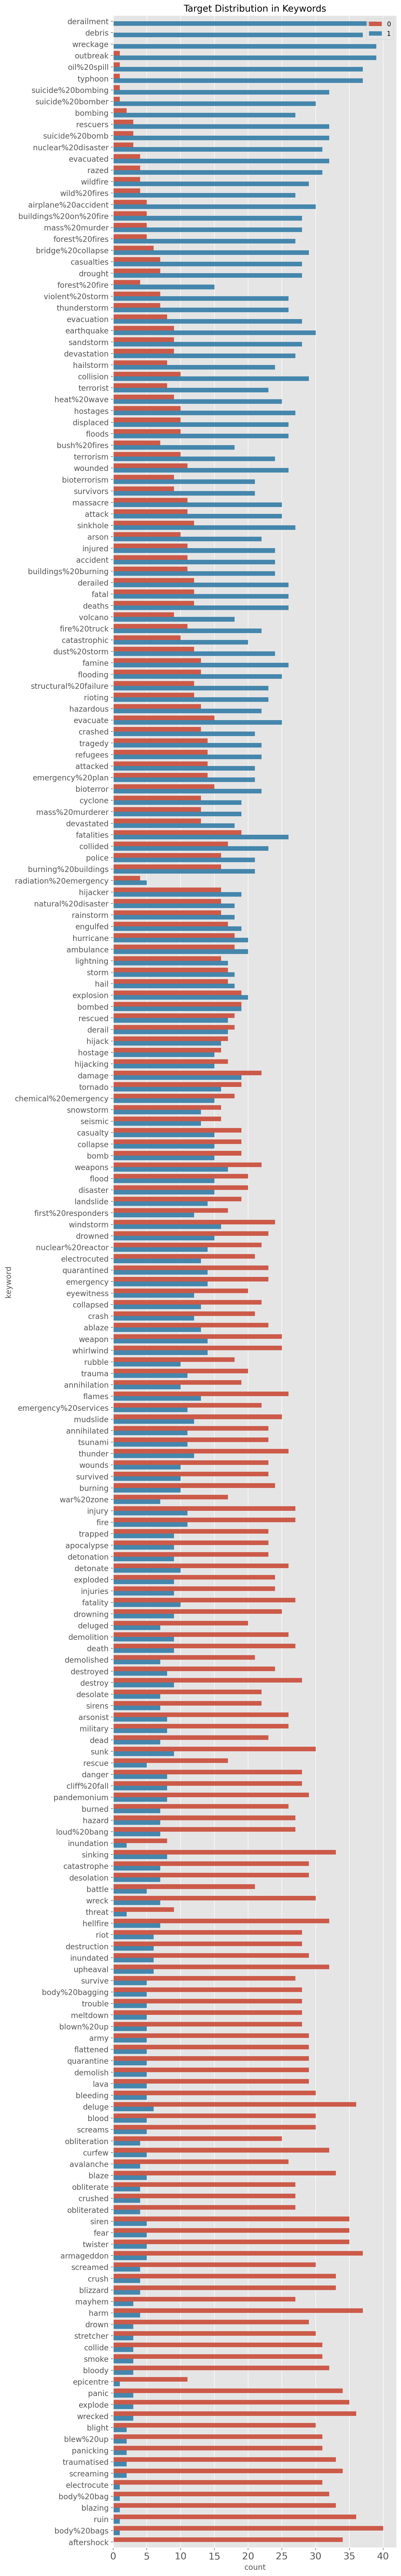

In [19]:
# reference: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert#3.-Target-and-N-grams
train_df['target_mean'] = train_df.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=200)

sns.countplot(y=train_df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_df.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_df.drop(columns=['target_mean'], inplace=True)

<a id="text"></a>
<h2 style='color:#0084b4;font-size:150%'>7. Text</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

##### __a. Số lượng từ trung bình của mỗi tweet?__

In [20]:
word_count = pd.DataFrame()
word_count['target'] = train_df['target'].copy()
word_count['count'] = train_df['text'].apply(lambda x: len(x.split()))
# sns.displot(word_count['count'], hue=word_count['target'])

idx = word_count['target'].unique().tolist()
vals = [word_count[word_count['target'] == i]['count'] for i in idx]
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(vals, idx)

# Add title
fig.update_layout(title_text='Word count distribution with Target variable in training set')
fig.show()

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

##### __b. Số lượng từ duy nhất của mỗi tweet?__

In [21]:
word_count = pd.DataFrame()
word_count['target'] = train_df['target'].copy()
word_count['count'] = train_df['text'].apply(lambda x: len(set(x.split())))
# sns.displot(word_count['count'], hue=word_count['target'])

idx = word_count['target'].unique().tolist()
vals = [word_count[word_count['target'] == i]['count'] for i in idx]
# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(vals, idx)

# Add title
fig.update_layout(title_text='Unique word count distribution with Target variable in training set')
fig.show()

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

##### __c. Số lượng stopwords của mỗi tweet?__

In [22]:
stop_words=set(stopwords.words('english'))

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Phân bố stopwords của class 0

In [23]:
def create_corpus(target):
    corpus=[]
    
    for x in train_df[train_df['target']==target]['text'].values:
        for i in x.split():
            corpus.append(i)
    return corpus

In [24]:
corpus = create_corpus(0)
dic = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
top

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442)]

Text(0.5, 1.0, 'Top 10 stopword trong các tweets')

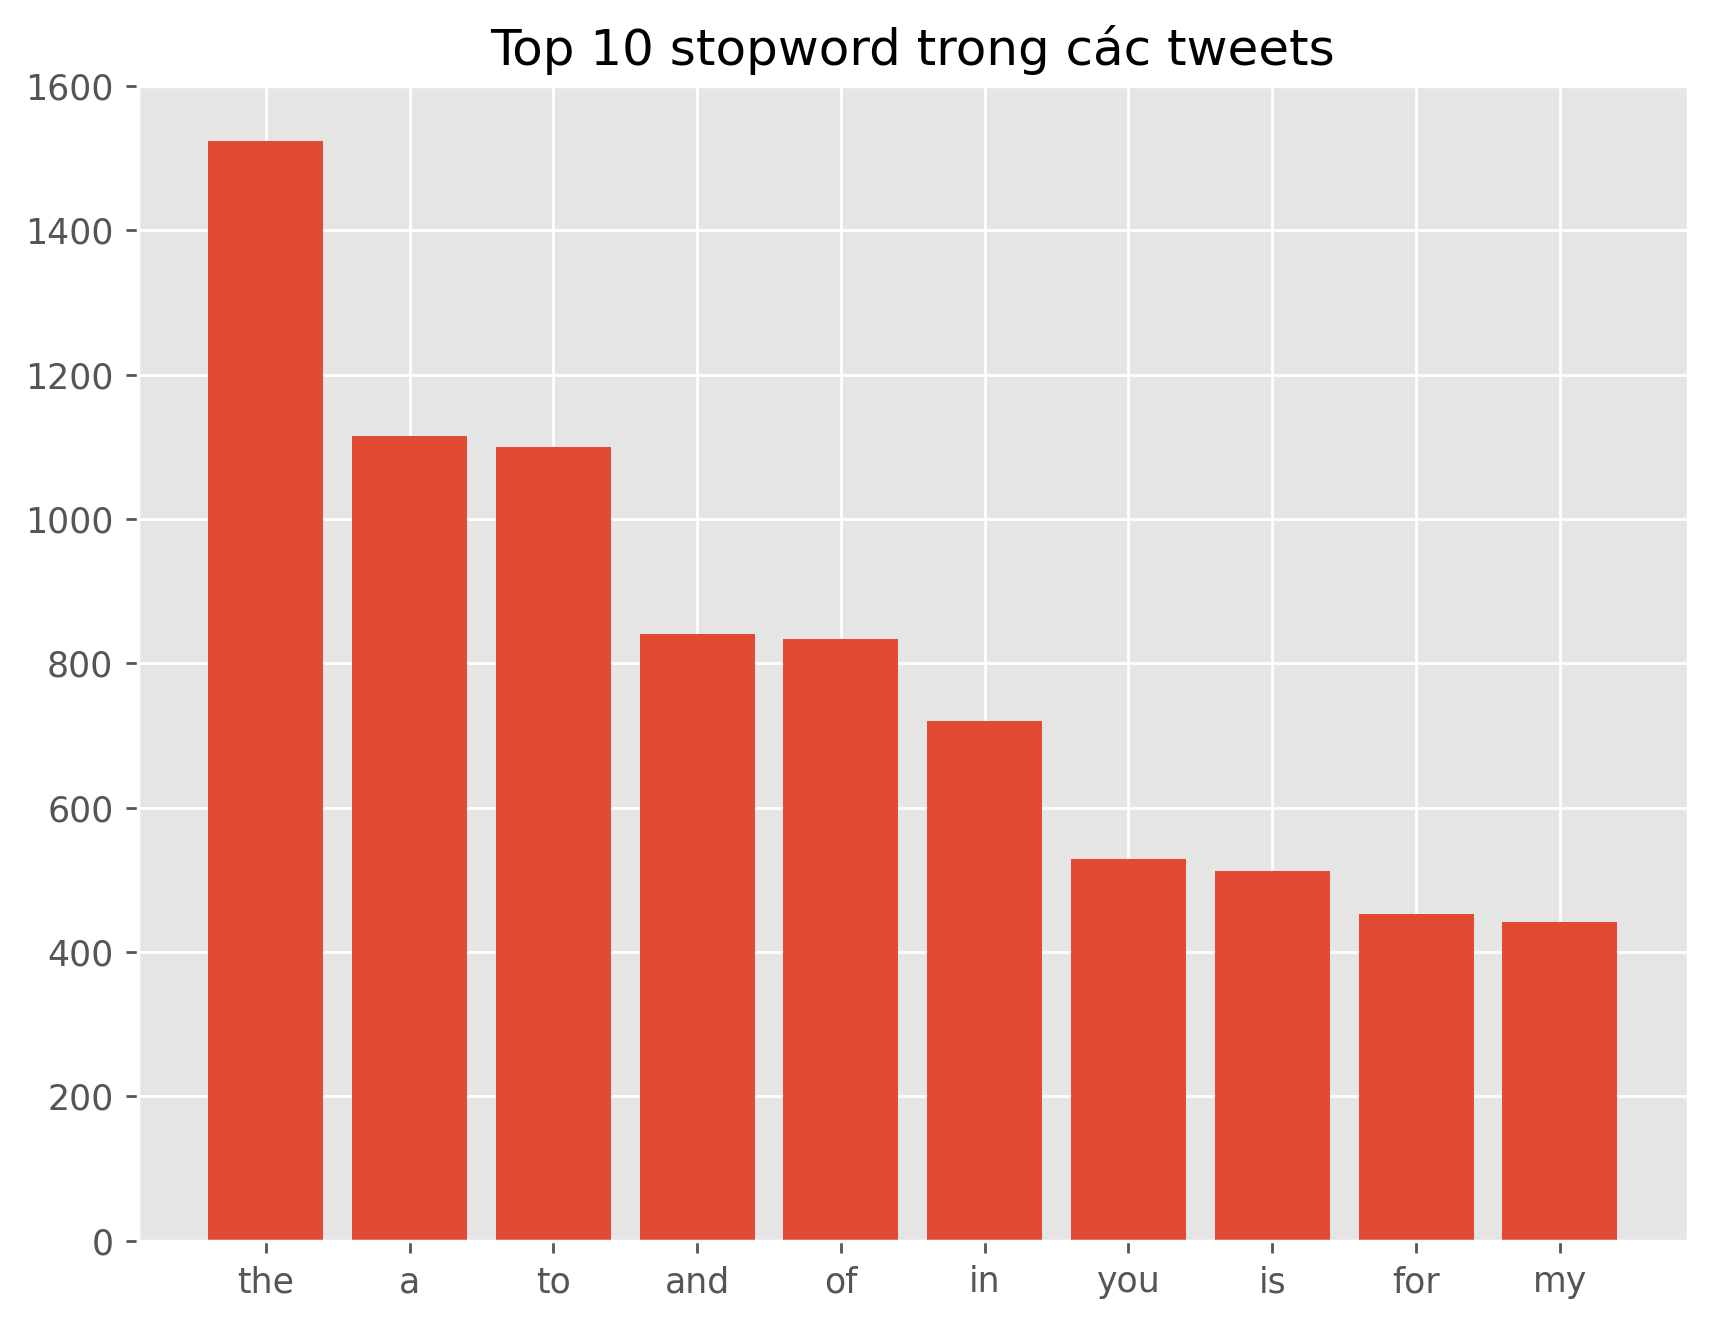

In [25]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
x,y=zip(*top)
ax = plt.bar(x,y)
# ax.bar_label(ax.containers[0], fmt='%d', fontsize=8)

plt.title("Top 10 stopword trong các tweets")

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

##### __d. Số lượng dấu câu của các tweet__

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 137 (\x89) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 137 (\x89) missing from current font.



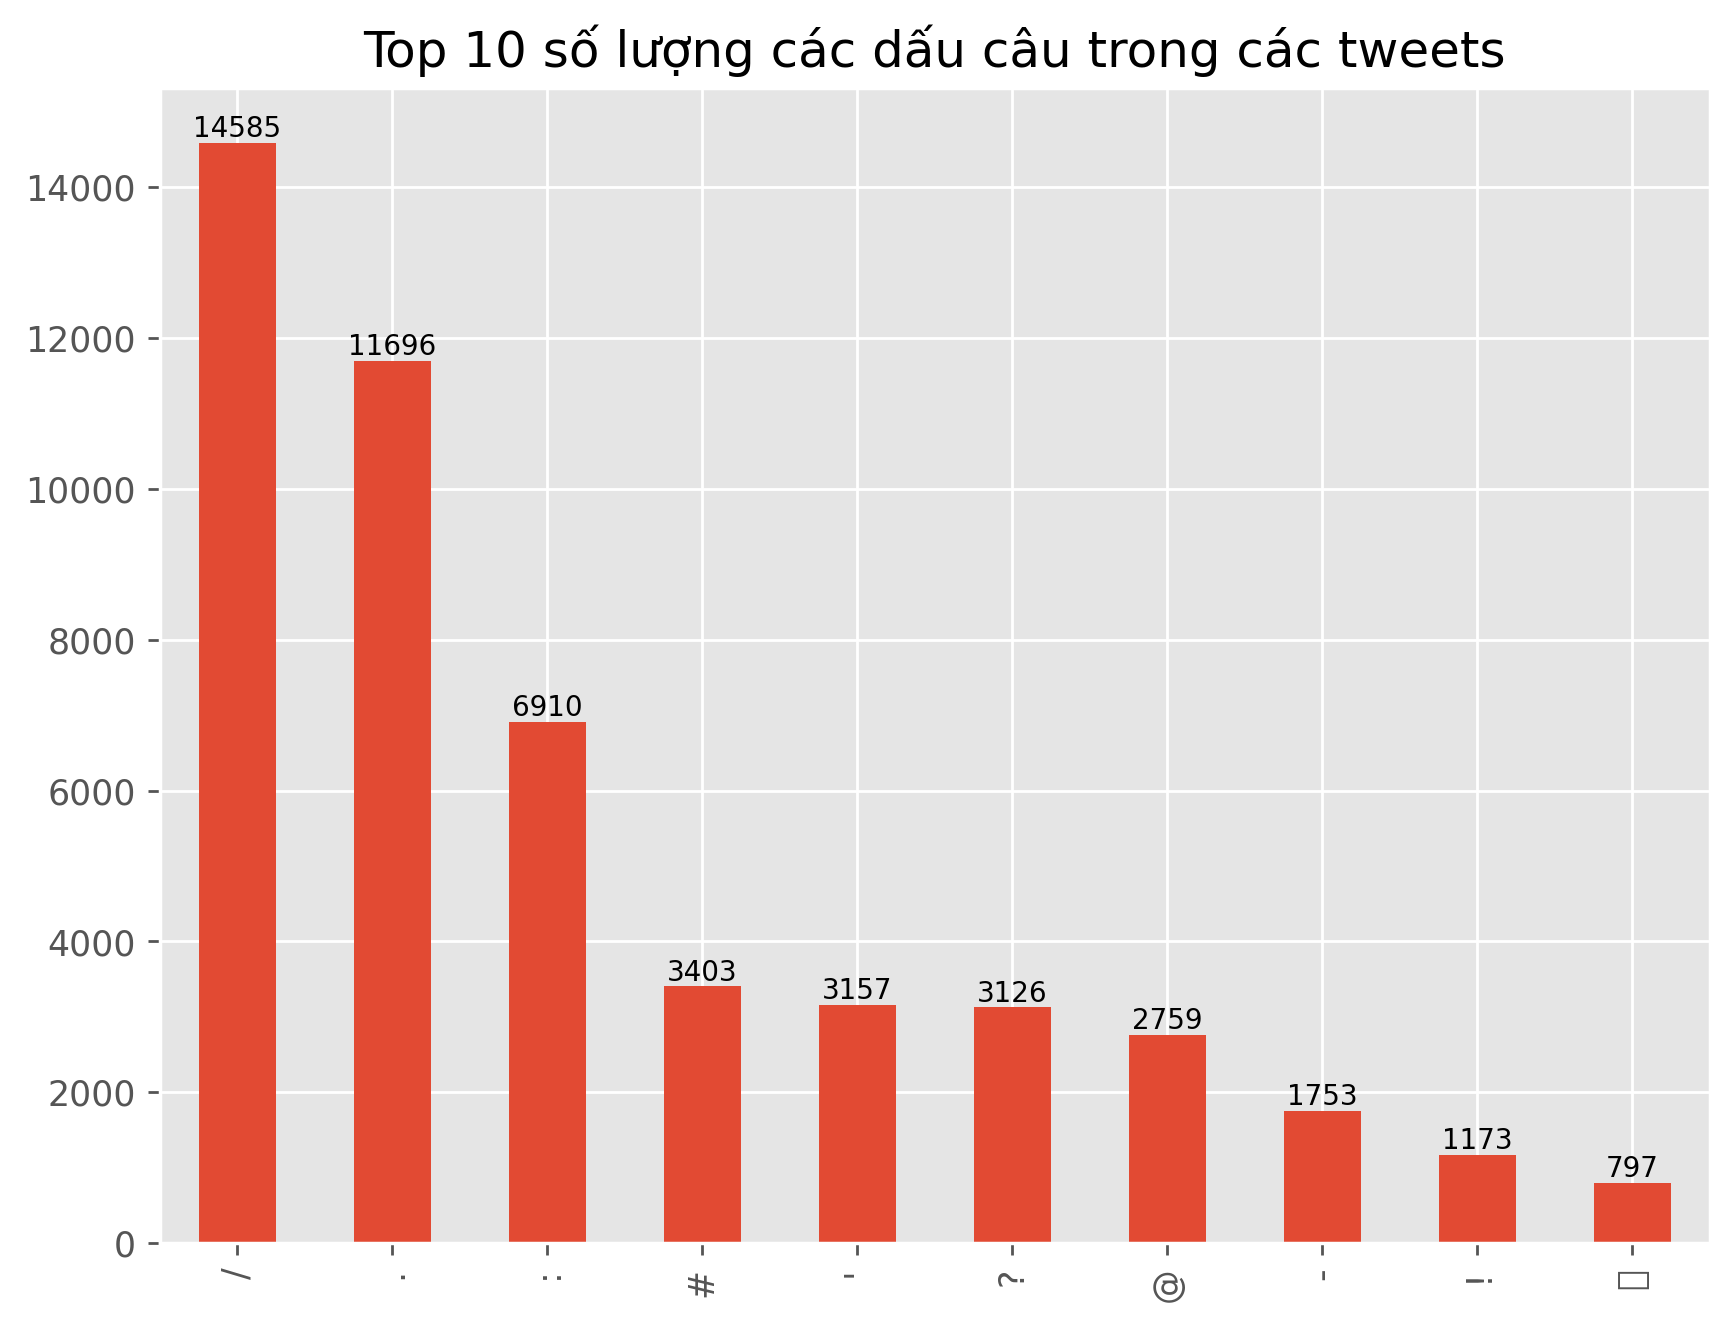

In [26]:
punc_df = train_df['text'].str.findall('[^\w\s]').explode().value_counts()[:10]
fig, ax = plt.subplots(figsize=(8, 6), dpi=250)
ax = punc_df.plot(kind = 'bar', title="Top 10 số lượng các dấu câu trong các tweets")
ax.bar_label(ax.containers[0], fmt='%d', fontsize=8)

fig.show()

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">
    &#9889; <mark>Observation:</mark>
    
- Các dấu `#` và `@` có ý nghĩa đặc biệt trong trường hợp này, bởi vì đây là các tweet trên mạng xã hội __Twitter__:
    - `#`: Hashtag, dùng để tạo các tag cho bài viết, các tag này có thể là nội dung chính, người, ...
    - `@`: Mention, dùng để nhắc đến 1 tài khoản twitter nào đó.

In [27]:
# top_train = train_df['text'].str.findall('[^\w\s]').explode().value_counts()[:10]
# top_test = test_df['text'].str.findall('[^\w\s]').explode().value_counts()[:10]
# top_train, top_test

<div id="ngrams" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        N-grams
    </h3>
</div>
    
<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<a id="make-ngrams"></a>
<h2 style='color:#0084b4;font-size:150%'>1. Create N-grams</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

In [28]:
# reference: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/notebook#3.-Target-and-N-grams
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop_words]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

def create_df(n_gram):
    disaster_ngrams = defaultdict(int)
    nondisaster_ngrams = defaultdict(int)

    for tweet in train_df[train_df['target'] == 1]['text']:
        for word in generate_ngrams(tweet, n_gram):
            disaster_ngrams[word] += 1

    for tweet in train_df[train_df['target'] == 0]['text']:
        for word in generate_ngrams(tweet, n_gram):
            nondisaster_ngrams[word] += 1
            
    df_disaster_ngrams = pd.DataFrame(sorted(disaster_ngrams.items(), key=lambda x: x[1])[::-1])
    df_nondisaster_ngrams = pd.DataFrame(sorted(nondisaster_ngrams.items(), key=lambda x: x[1])[::-1])

    return df_disaster_ngrams, df_nondisaster_ngrams
    
# Unigrams

df_disaster_unigrams, df_nondisaster_unigrams = create_df(1)

# Bigrams
        
df_disaster_bigrams, df_nondisaster_bigrams = create_df(2)

# Trigrams
        
df_disaster_trigrams, df_nondisaster_trigrams = create_df(3)

In [29]:
def draw_ngrams(typ, df1, df2, N):
    fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
    plt.tight_layout()

    sns.barplot(y=df1[0].values[:N], x=df1[1].values[:N], ax=axes[0], color='orange')
    sns.barplot(y=df2[0].values[:N], x=df2[1].values[:N], ax=axes[1], color='lightblue')

    for i in range(2):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=13)

    axes[0].set_title(f'Top {N} most common {typ} in Disaster Tweets', fontsize=15)
    axes[1].set_title(f'Top {N} most common {typ} in Non-disaster Tweets', fontsize=15)

    plt.show()

<a id="unigrams"></a>
<h2 style='color:#0084b4;font-size:150%'>2. Unigrams</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Các unigram xuất hiện nhiều nhất ở các tweet non-disaster và disaster chủ yếu là các dấu câu và stopword.
- Các từ đơn xuất hiện nhiều nhất ở các tweet disaster đã có chứa các thông tin về loại disaster: fire, suicide, killed,...
- Các từ đơn xuất hiện nhiều nhất ở các tweet non-disaster chủ yếu là các động từ, phần lớn các câu chứa động từ thường mang nghĩa không trang trọng và đến từ các người dùng bình thường.

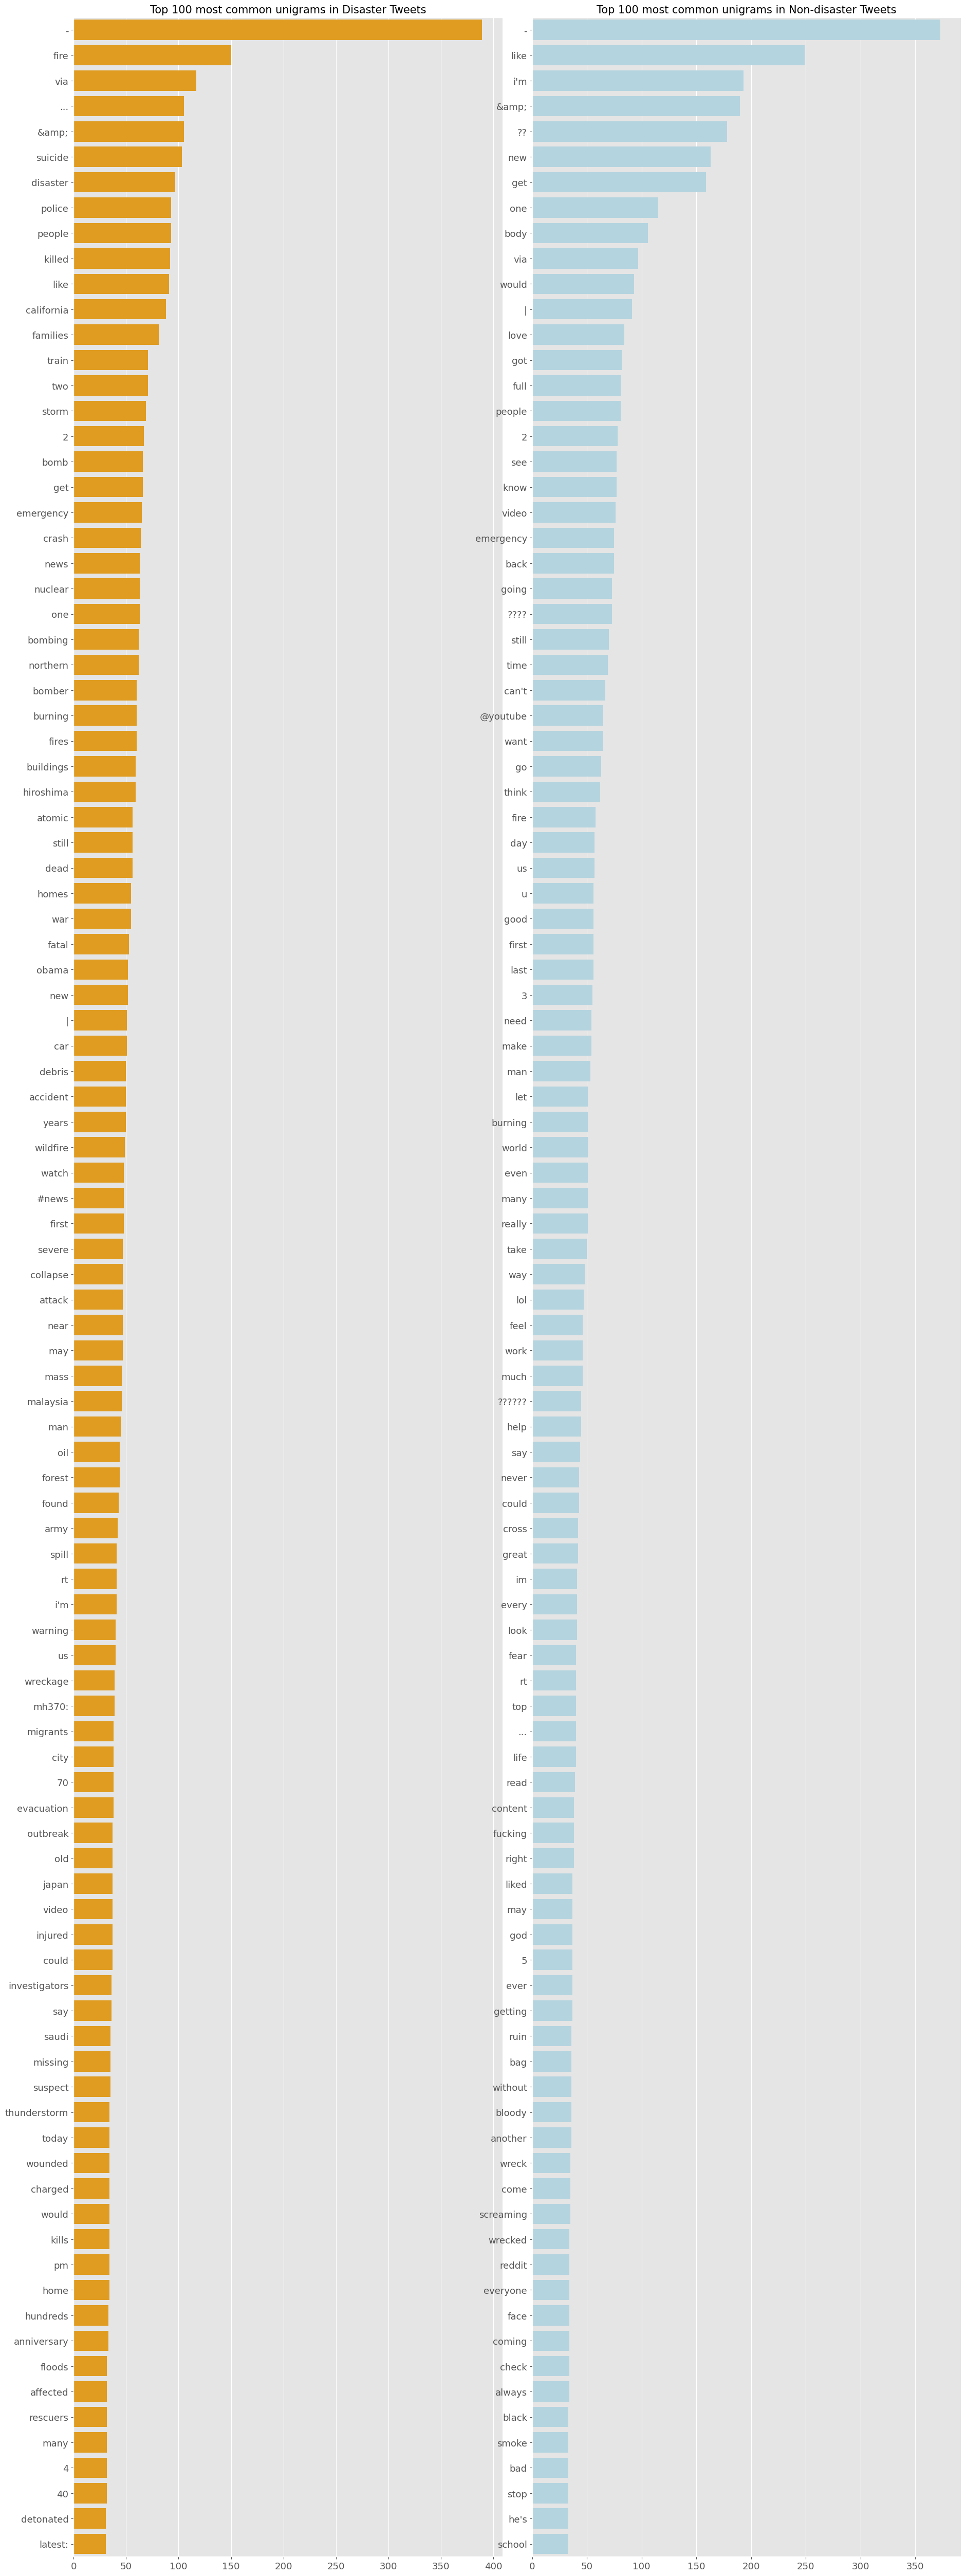

In [30]:
draw_ngrams("unigrams",df_disaster_unigrams, df_nondisaster_unigrams, 100)

<a id="bigrams"></a>
<h2 style='color:#0084b4;font-size:150%'>3. Bigrams</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Không có các bigram chung giữa non-disaster và disaster.
- Các bigram của disaster tweet đã cung cấp nhiều thông tin hơn về disaster. Tuy nhiên vẫn cần loại bỏ các dấu câu.
- Các bigram của non-disaster tweet chủ yếu chứa `youtube`,`reddit`, các hashtag và rất nhiều dấu câu.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 137 (\x89) missing from current font.



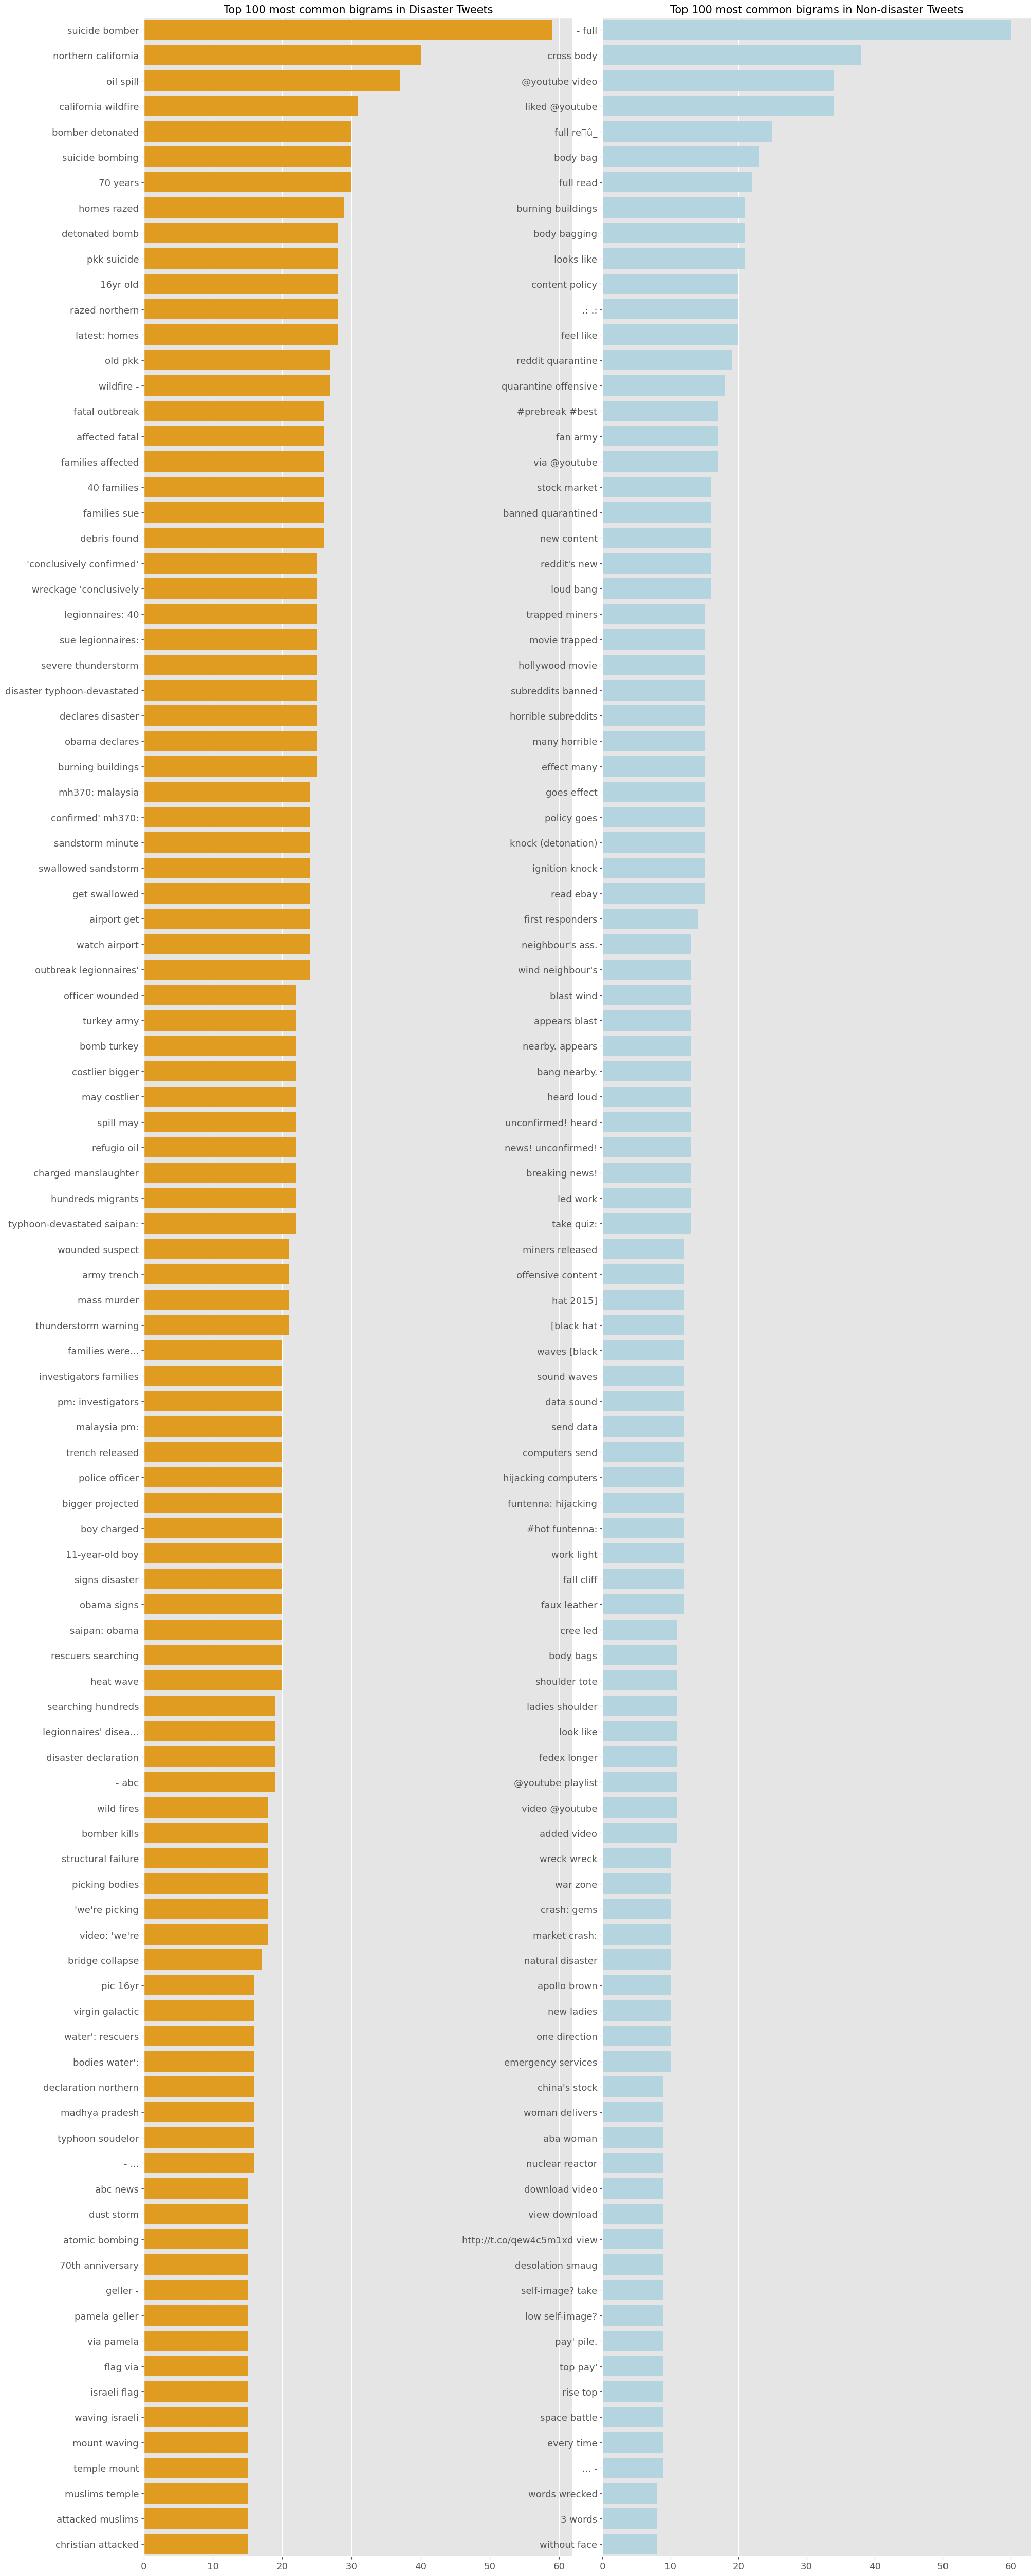

In [31]:
draw_ngrams("bigrams",df_disaster_bigrams, df_nondisaster_bigrams, 100)

<a id="trigrams"></a>
<h2 style='color:#0084b4;font-size:150%'>4. Trigrams</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Không có các trigram xuất hiện chung giữa non-disaster và disaster.
- Các trigram của 2 lớp gần như giống với các bigram:
    - Disaster tweet mang lại nhiều thông tin hơn.
    - Non-disaster tweet chứa nhiều dấu câu hơn.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 137 (\x89) missing from current font.



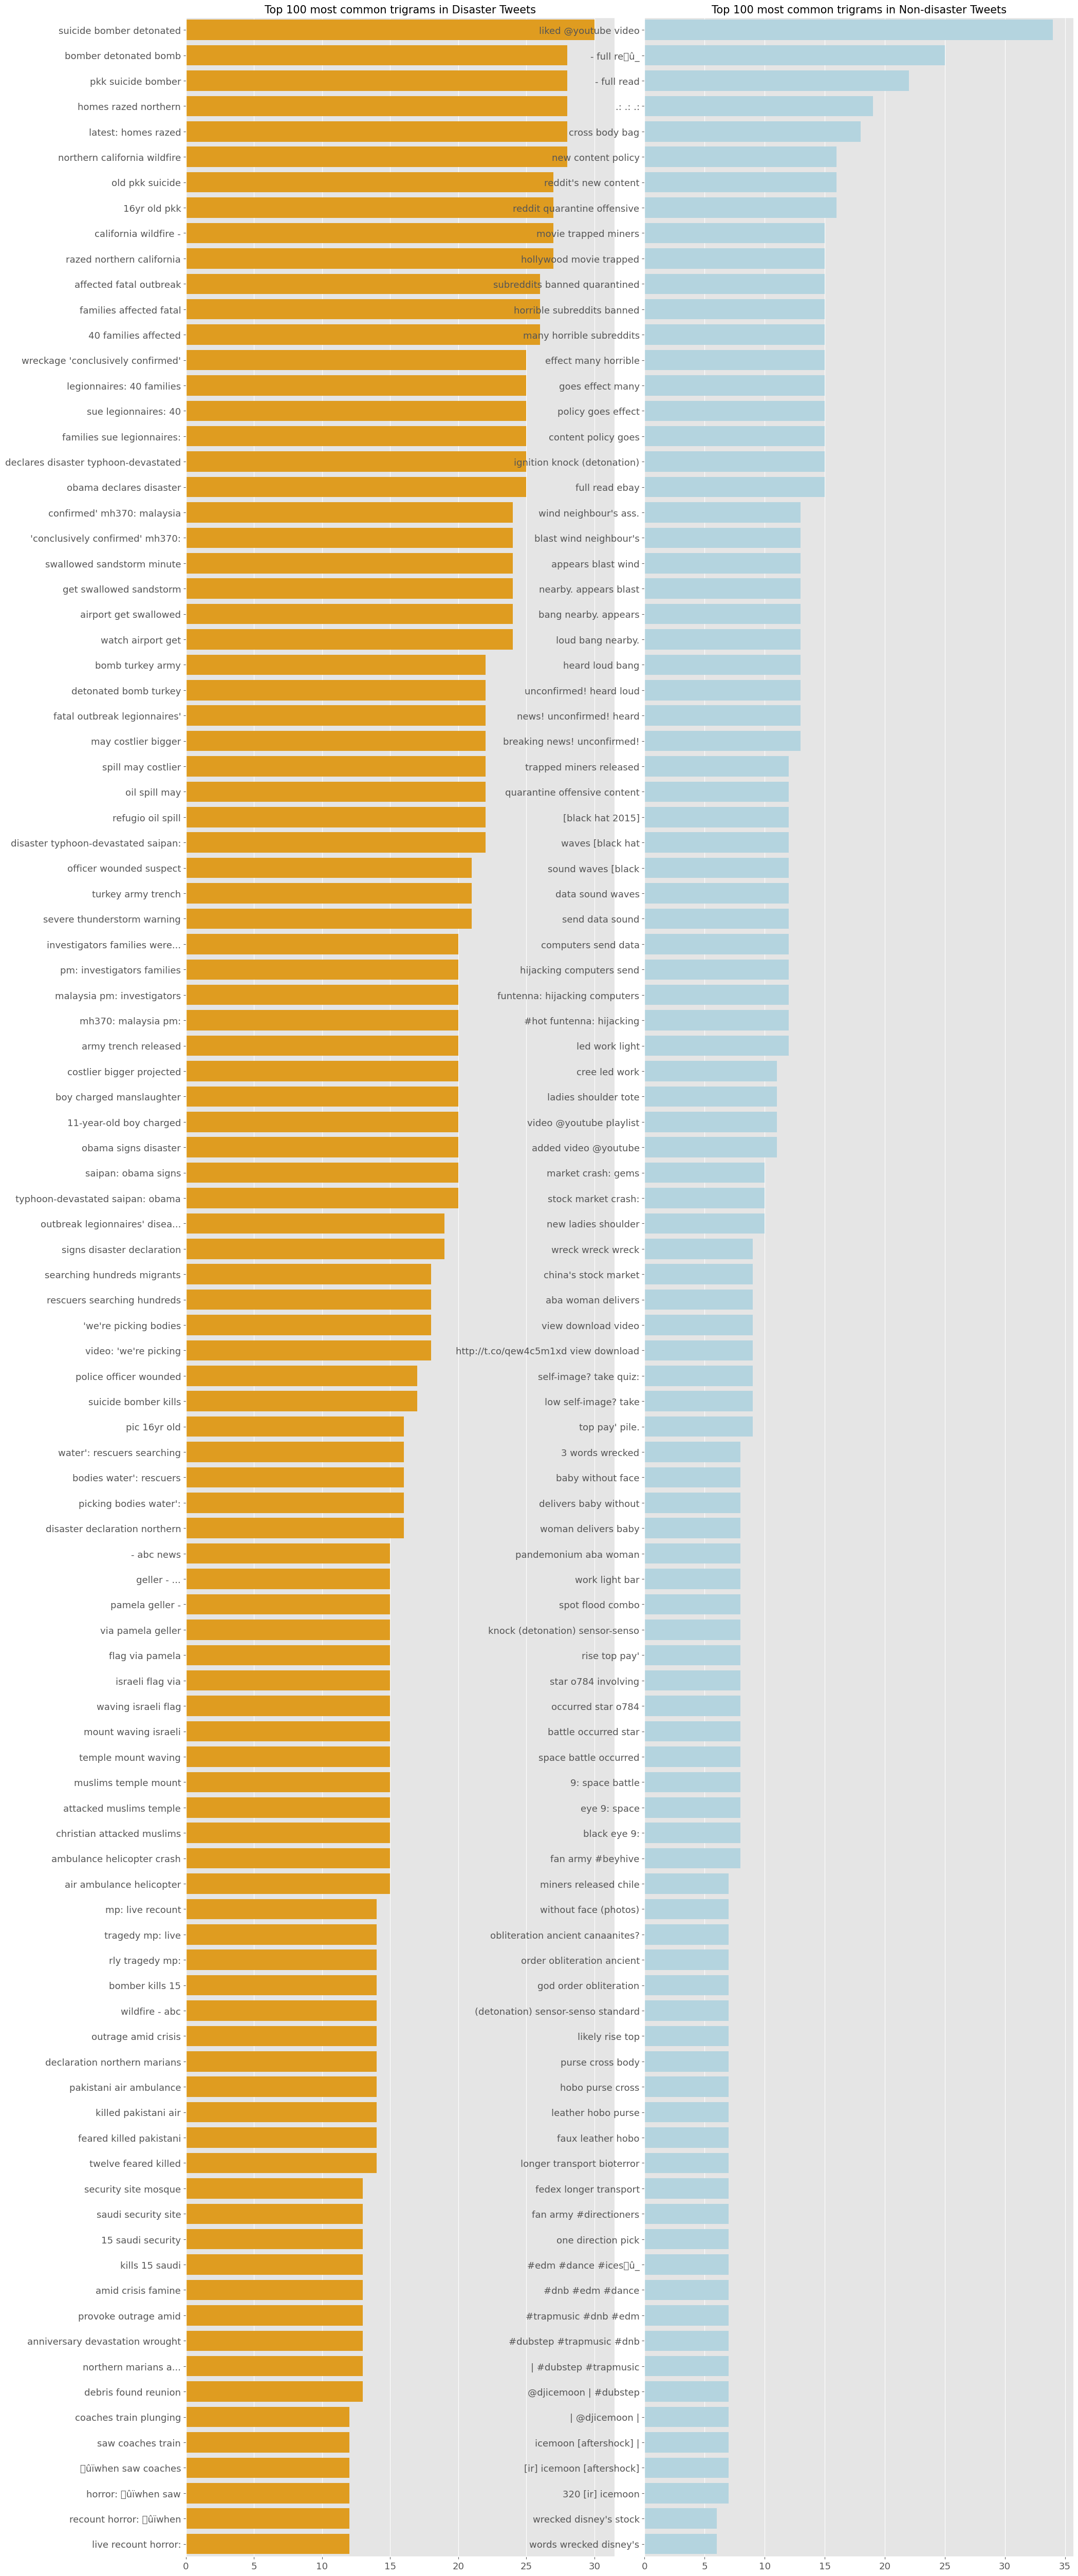

In [32]:
draw_ngrams("trigrams",df_disaster_trigrams, df_nondisaster_trigrams, 100)

<div id="preprocessing" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Preprocessing
    </h3>
</div>
    
<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<a id="text_cleaning"></a>
<h2 style='color:#0084b4;font-size:150%'>1. Text cleaning and embedding</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

##### __a. Embedding__
Vì ta sử dụng pre-trained embedding, nên việc thực hiện các thao tác tiền xử lý thông thường có thể làm mất đi thông tin của dữ liệu, cách tốt nhất là cố gắng tăng độ phủ của từ điển lên embedding nhiều nhất có thể.

In [33]:
%%time

glove_embeddings = np.load('../input/pickled-glove840b300d-for-10sec-loading/glove.840B.300d.pkl', allow_pickle=True)
fasttext_embeddings = np.load('../input/pickled-crawl300d2m-for-kernel-competitions/crawl-300d-2M.pkl', allow_pickle=True)

CPU times: user 16 s, sys: 5.57 s, total: 21.5 s
Wall time: 59.3 s


<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Các từ xuất hiện trong cả embedding và vocab sẽ được lưu trong biến covered cùng với số lượng của các từ đó. Các từ xuất hiện trong vocab nhưng không xuất hiện trong embedding sẽ được lưu trong biến oov cùng với số lượng.
    
- Cả Glove và Fastext embedding đều có hơn 50% và 80% độ bao phủ khi chưa clean.

In [34]:
def build_vocab(X):
    
    tweets = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for tweet in tweets:
        for word in tweet:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab


def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(train_df['text'], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test_df['text'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))

train_fasttext_oov, train_fasttext_vocab_coverage, train_fasttext_text_coverage = check_embeddings_coverage(train_df['text'], fasttext_embeddings)
test_fasttext_oov, test_fasttext_vocab_coverage, test_fasttext_text_coverage = check_embeddings_coverage(test_df['text'], fasttext_embeddings)
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_fasttext_vocab_coverage, train_fasttext_text_coverage))
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_fasttext_vocab_coverage, test_fasttext_text_coverage))

GloVe Embeddings cover 52.06% of vocabulary and 82.68% of text in Training Set
GloVe Embeddings cover 57.21% of vocabulary and 81.85% of text in Test Set
FastText Embeddings cover 51.52% of vocabulary and 81.84% of text in Training Set
FastText Embeddings cover 56.55% of vocabulary and 81.12% of text in Test Set


In [35]:
%%time

def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"vscodc", "vsco DC", tweet)
    tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
    tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
    tweet = re.sub(r"buildingmuseum", "building museum", tweet)
    tweet = re.sub(r"WorldOil", "World Oil", tweet)
    tweet = re.sub(r"redwedding", "red wedding", tweet)
    tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
    tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
    tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
    tweet = re.sub(r"bleased", "blessed", tweet)
    tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
    tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
    tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
    tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
    tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
    tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
    tweet = re.sub(r"dirtylying", "dirty lying", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
    
#     # Remove HTML Tags
#     tweet = re.sub('<.*?>', '', tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet) # r'https?://\S+|www\.\S+'
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

train_df['text_cleaned'] = train_df['text'].apply(lambda s : clean(s))
test_df['text_cleaned'] = test_df['text'].apply(lambda s : clean(s))

train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(train_df['text_cleaned'], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test_df['text_cleaned'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))

train_fasttext_oov, train_fasttext_vocab_coverage, train_fasttext_text_coverage = check_embeddings_coverage(train_df['text_cleaned'], fasttext_embeddings)
test_fasttext_oov, test_fasttext_vocab_coverage, test_fasttext_text_coverage = check_embeddings_coverage(test_df['text_cleaned'], fasttext_embeddings)
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_fasttext_vocab_coverage, train_fasttext_text_coverage))
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_fasttext_vocab_coverage, test_fasttext_text_coverage))

GloVe Embeddings cover 82.89% of vocabulary and 97.14% of text in Training Set
GloVe Embeddings cover 88.09% of vocabulary and 97.32% of text in Test Set
FastText Embeddings cover 82.88% of vocabulary and 97.12% of text in Training Set
FastText Embeddings cover 87.80% of vocabulary and 97.25% of text in Test Set
CPU times: user 7min 7s, sys: 182 ms, total: 7min 7s
Wall time: 7min 8s


In [36]:
import gc
del glove_embeddings, fasttext_embeddings, train_glove_oov, test_glove_oov, train_fasttext_oov, test_fasttext_oov
gc.collect()

0

In [37]:
df_mislabeled = train_df.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
df_mislabeled.index.tolist()

['like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'Hellfire! We don\x89Ûªt even want to think about it or mention it so let\x89Ûªs not do anything that leads to it #islam!',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 'To fight bioterrorism sir.',
 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'He came to a land which was engulfed in tribal war and turned it into a land 

In [38]:
train_df['target_relabeled'] = train_df['target'].copy() 

train_df.loc[train_df['text'] == 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit', 'target_relabeled'] = 0
train_df.loc[train_df['text'] == 'Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife', 'target_relabeled'] = 0
train_df.loc[train_df['text'] == 'To fight bioterrorism sir.', 'target_relabeled'] = 0
train_df.loc[train_df['text'] == '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4', 'target_relabeled'] = 1
train_df.loc[train_df['text'] == 'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring', 'target_relabeled'] = 1
train_df.loc[train_df['text'] == '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption', 'target_relabeled'] = 0
train_df.loc[train_df['text'] == 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!', 'target_relabeled'] = 0
train_df.loc[train_df['text'] == 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE', 'target_relabeled'] = 1
train_df.loc[train_df['text'] == 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG', 'target_relabeled'] = 1
train_df.loc[train_df['text'] == "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "wowo--=== 12000 Nigerian refugees repatriated from Cameroon", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it #islam!", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "Caution: breathing may be hazardous to your health.", 'target_relabeled'] = 1
train_df.loc[train_df['text'] == "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect", 'target_relabeled'] = 0
train_df.loc[train_df['text'] == "that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time", 'target_relabeled'] = 0

In [39]:
train_df

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                                                                     text  \
0                                   Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all   
1                                                                  Forest fire near La Ronge Sask. Canada   
2     All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...   
3                                       13,000 people receive #wildfires evacuation orders in California    
4                Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school    
...                                                                                                   ...   
7608                  Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5   
7609  @aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part ...   
7610                                    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ   
7611  Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffer...   
7612       The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d   

      target  \
0          1   
1          1   
2          1   
3          1   
4          1   
...      ...   
7608       1   
7609       1   
7610       1   
7611       1   
7612       1   

                                                                                             text_cleaned  \
0                                 Our Deeds are the Reason of this  # earthquake May ALLAH Forgive us all   
1                                                                Forest fire near La Ronge Sask .  Canada   
2     All residents asked to  ' shelter in place '  are being notified by officers .  No other evacuat...   
3                                     13,000 people receive  # wildfires evacuation orders in California    
4            Just got sent this photo from Ruby  # Alaska as smoke from  # wildfires pours into a school    
...                                                                                                   ...   
7608                                        Two giant cranes holding a bridge collapse into nearby homes    
7609   @ Aria Ahrary  @ TheTawniest The out of control wild fires in California even in the Northern p...   
7610                                              M1 . 94  [ 01 : 04 UTC ]  ? 5km S of Volcano Hawaii .     
7611  Police investigating after an e - bike collided with a car in Little Portugal .  E - bike rider ...   
7612                         The Latest :  More Homes Razed by Northern California Wildfire  -  ABC News    

      target_relabeled  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
7608                 1  
7609                 1  
7610                 1  
7611                 1  
7612                 1  

[7613 rows x 7 columns]

<div id="buildmodel" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Build Model
    </h3>
</div>
    
<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Load file perfect score để so sánh với kết quả

In [40]:
perfect_score = pd.read_csv("/kaggle/input/perfectsubmission/perfect_submission.csv")
perfect_score

id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       0
3259  10865       1
3260  10868       1
3261  10874       1
3262  10875       1

[3263 rows x 2 columns]

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Hầu hết các Neuron Netwwork đều không thể xử lý dữ liệu đầu vào thô, do đó ta cần tokenize và chuyển thành các con số.
    
- Tokenize: Cắt text thành các token, map mỗi token với một số nguyên.

In [41]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result
preprocess("   TEst  is  for post   process ...")

['test', 'post', 'process']

In [42]:
train_df["text_clean"] = train_df["text_cleaned"].apply(preprocess)
test_df["text_clean"] = test_df["text_cleaned"].apply(preprocess)

<a id="lstm"></a>
<h2 style='color:#0084b4;font-size:150%'>1. LSTM</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- LSTM - Long short term memory

In [43]:
# Chia tập train và validation
X_train, X_val, y_train, y_val = train_test_split(train_df["text_cleaned"].values, train_df["target_relabeled"].values, 
                                                  test_size=.15, shuffle=True)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(6471,) (6471,) (1142,) (1142,)


<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Tính tổng số từ 

In [44]:
list_of_words = []
for i in train_df.text_clean + train_df.text_clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

14445

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Thực hiện tokenize và padding

In [45]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)
test_sequences = tokenizer.texts_to_sequences(test_df['text_cleaned'].values)

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 20, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 20, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 20, padding = 'post', truncating = 'post')
     

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Building LSTM model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

## Creating model Using LSTM
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(total_words, embedding_vector_features, input_length=20))
model.add(Dropout(0.5)) # Increase dropout rate to 0.5
model.add(LSTM(100, kernel_regularizer=l2(0.01))) # Use L2 regularization
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            577800    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 634,301
Trainable params: 634,301
Non-trainable params: 0
_________________________________________________________________
None


<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Training the model

In [48]:
model.fit(padded_train, 
          y_train, 
          batch_size = 64, 
          validation_data=(padded_val, y_val), 
          epochs = 3,
         callbacks=[early_stopping])

Epoch 1/3
102/102 [==============================] - 19s 132ms/step - loss: 0.8573 - accuracy: 0.6470 - val_loss: 0.5021 - val_accuracy: 0.8021
Epoch 2/3
102/102 [==============================] - 6s 55ms/step - loss: 0.4160 - accuracy: 0.8345 - val_loss: 0.4415 - val_accuracy: 0.8222
Epoch 3/3
102/102 [==============================] - 4s 35ms/step - loss: 0.2981 - accuracy: 0.8921 - val_loss: 0.4709 - val_accuracy: 0.8109


102/102 [==============================] - 1s 2ms/step
LSTM Model Accuracy :  0.5703340484216978
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1861
           1       0.00      0.00      0.00      1402

    accuracy                           0.57      3263
   macro avg       0.29      0.50      0.36      3263
weighted avg       0.33      0.57      0.41      3263



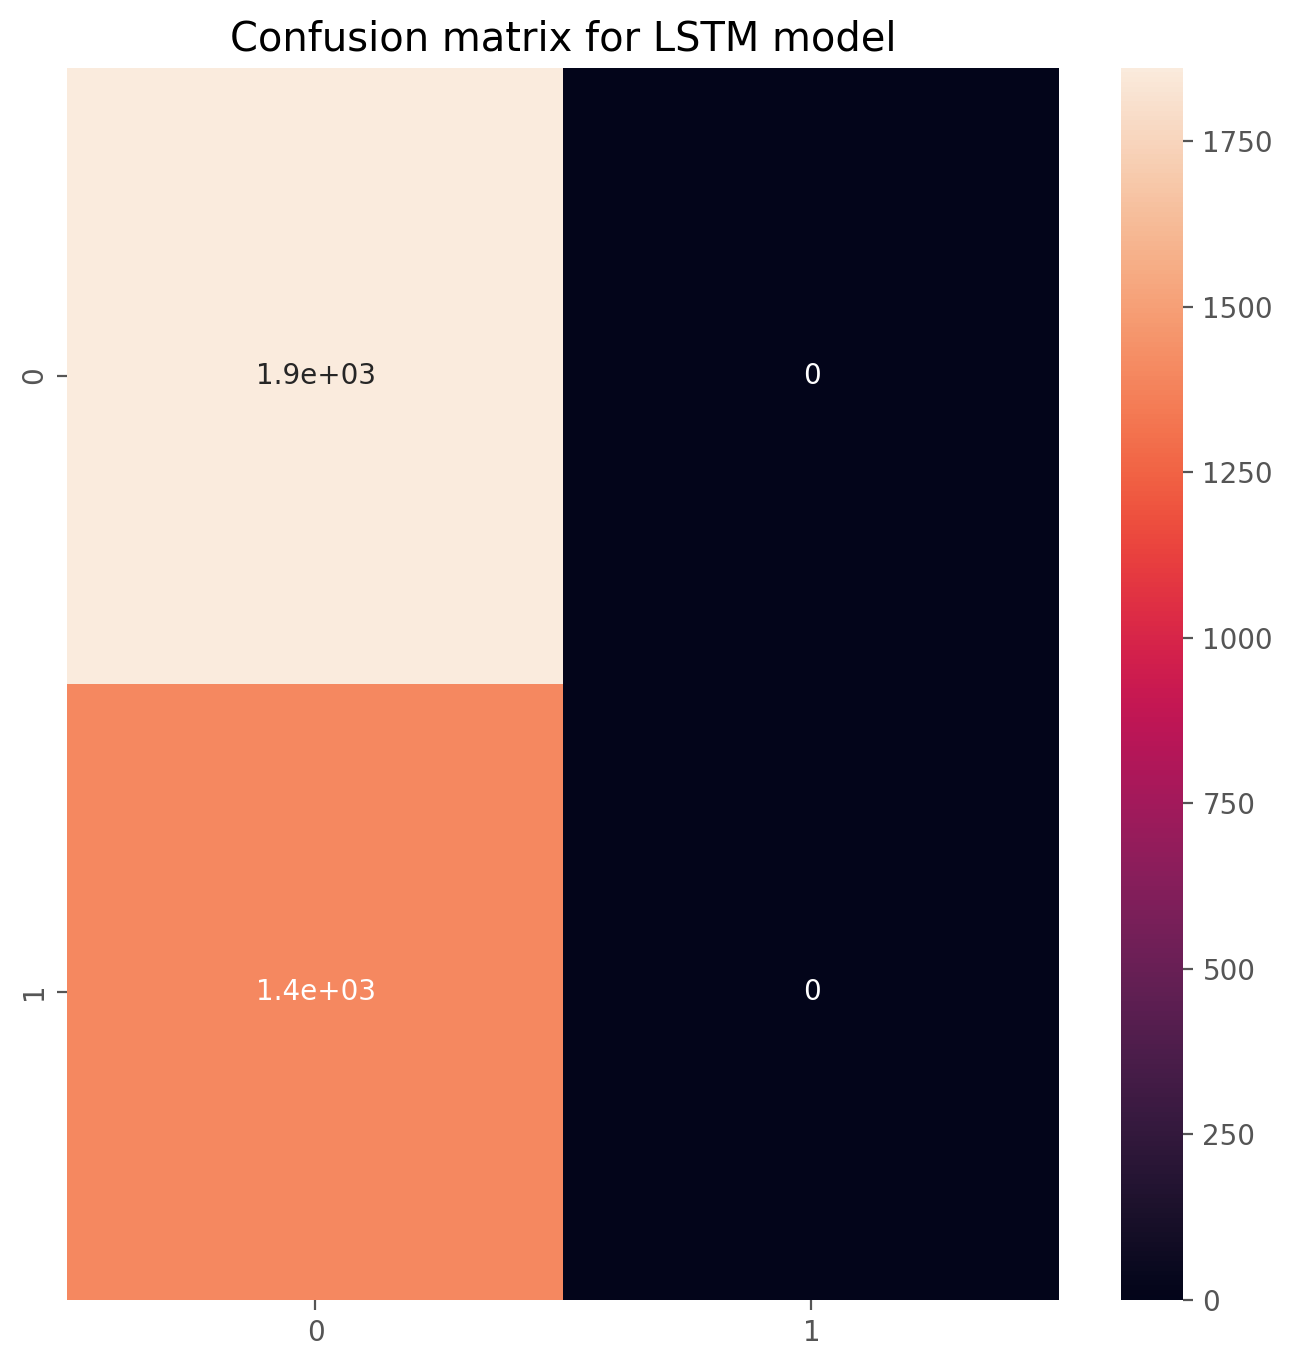

In [49]:
# Making prediction
predict_x=model.predict(padded_test) 
classes_x=np.argmax(predict_x,axis=1)


# Getting The Accuracy
accuracy = accuracy_score(perfect_score["target"], classes_x)

print("LSTM Model Accuracy : ", accuracy)


cm = confusion_matrix(perfect_score["target"], classes_x)
fig, ax = plt.subplots(figsize = (8, 8), dpi=200)
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title("Confusion matrix for LSTM model")

print(classification_report(perfect_score["target"], classes_x, zero_division=0))

<a id="bidirectional-lstm"></a>
<h2 style='color:#0084b4;font-size:150%'>2. Bidirectional-LSTM</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

In [50]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            577800    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 690,801
Trainable params: 690,801
Non-trainable params: 0
________________________________________________

In [51]:
model.fit(padded_train, 
          y_train, 
          batch_size = 64, 
          validation_data=(padded_val, y_val), 
          epochs = 3)

Epoch 1/3
102/102 [==============================] - 15s 110ms/step - loss: 0.5734 - accuracy: 0.6898 - val_loss: 0.4358 - val_accuracy: 0.7995
Epoch 2/3
102/102 [==============================] - 3s 31ms/step - loss: 0.3514 - accuracy: 0.8532 - val_loss: 0.4482 - val_accuracy: 0.8100
Epoch 3/3
102/102 [==============================] - 4s 38ms/step - loss: 0.2148 - accuracy: 0.9195 - val_loss: 0.5690 - val_accuracy: 0.8135


102/102 [==============================] - 1s 3ms/step
Bidirectional LSTM Model Accuracy :  0.5703340484216978
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1861
           1       0.00      0.00      0.00      1402

    accuracy                           0.57      3263
   macro avg       0.29      0.50      0.36      3263
weighted avg       0.33      0.57      0.41      3263



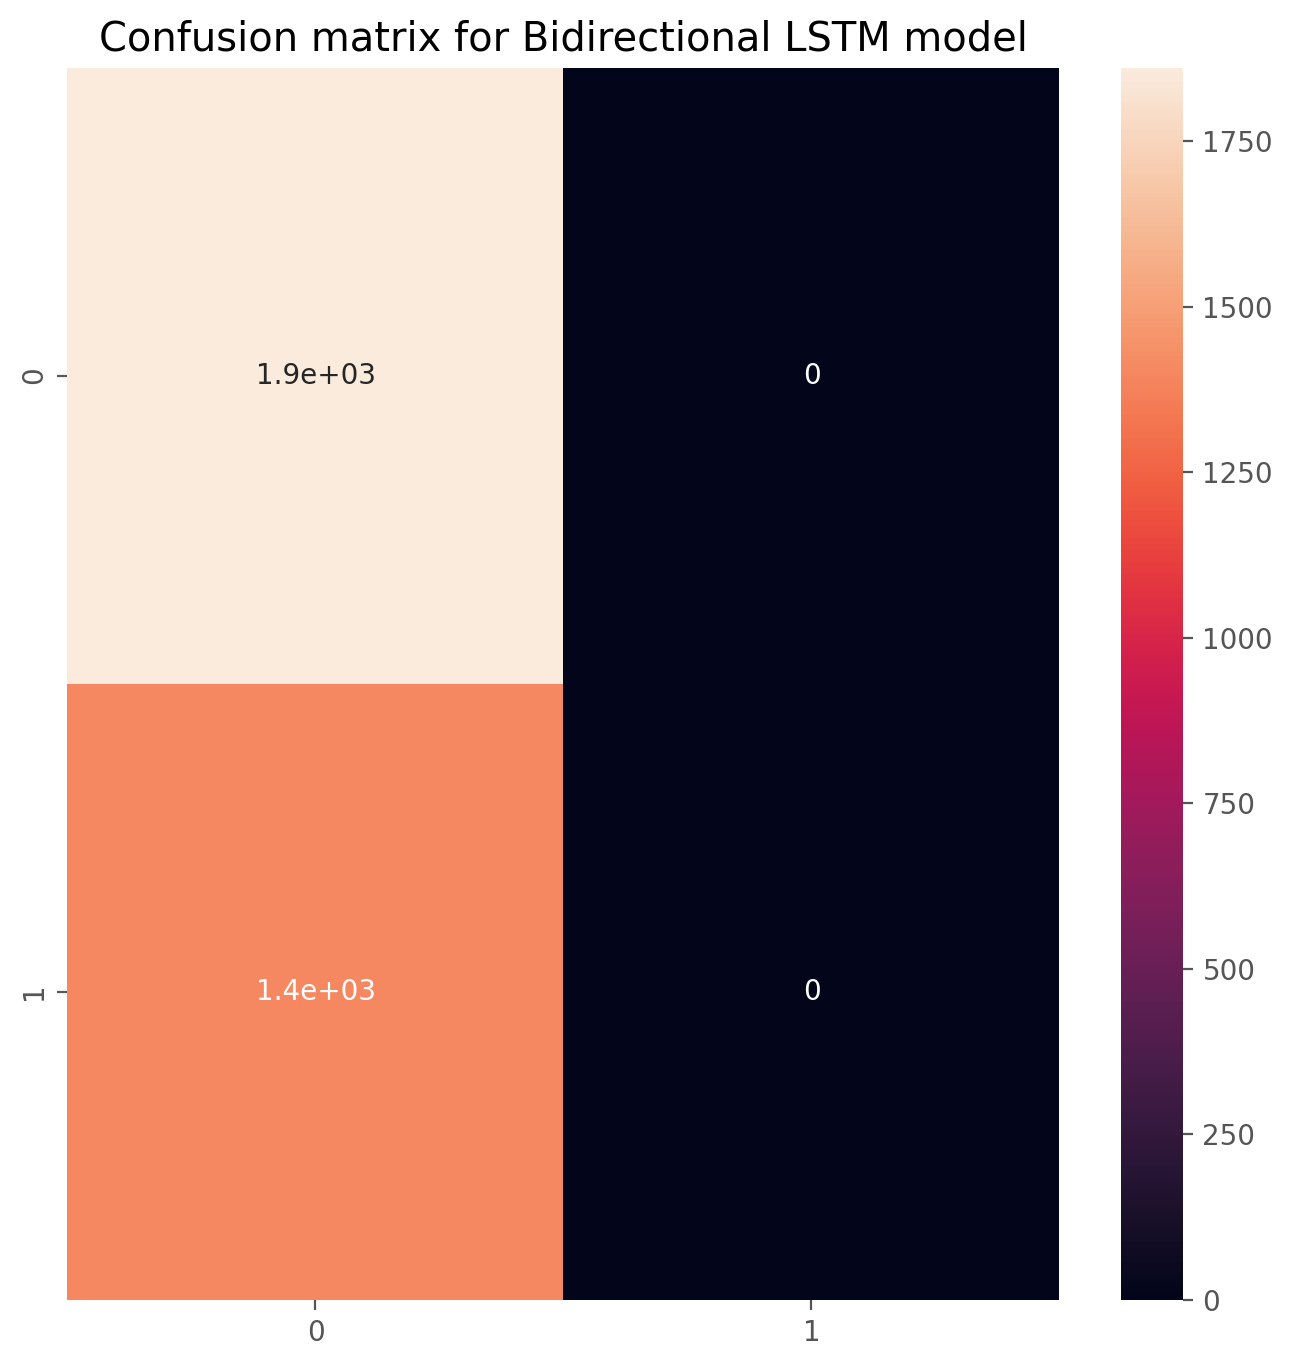

In [52]:
# Making prediction
predict_x=model.predict(padded_test) 
classes_x=np.argmax(predict_x,axis=1)


# Getting The Accuracy
accuracy = accuracy_score(perfect_score["target"], classes_x)

print("Bidirectional LSTM Model Accuracy : ", accuracy)


cm = confusion_matrix(perfect_score["target"], classes_x)
fig, ax = plt.subplots(figsize = (8, 8), dpi=200)
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title("Confusion matrix for Bidirectional LSTM model")

print(classification_report(perfect_score["target"], classes_x, zero_division=0))

<a id="distil-BERT"></a>
<h2 style='color:#0084b4;font-size:150%'>3. DistilBERT</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- DistilBERT là một mô hình SOTA trong task classification trên HuggingFace.
- Nhờ sự xuất hiện của HuggingFace Transformers mà việc thực hiện transfer-learning trở nên đơn giản hơn khá nhiều, workflow chính gồm có các bước:
    - Tokenize text.
    - Xác định model architecture.
    - Train Classification layer weights.

In [53]:
from transformers import TFDistilBertModel, DistilBertConfig
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification


DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Make DistilBERT layers untrainabl
for layer in distilBERT.layers:
    layer.trainable = False
    

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [54]:
# Chia tập train và validation
X_train, X_val, y_train, y_val = train_test_split(train_df["text_cleaned"].values, train_df["target_relabeled"].values, 
                                                  test_size=.15, shuffle=True)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(6471,) (6471,) (1142,) (1142,)


In [55]:
from transformers import DistilBertTokenizerFast
# Define the maximum number of words to tokenize (DistilBERT can tokenize up to 512)
MAX_LENGTH = 20
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Define function to encode text data in batches
def batch_encode(tokenizer, texts, batch_size=256, max_length=MAX_LENGTH):
    """""""""
    A function that encodes a batch of texts and returns the texts'
    corresponding encodings and attention masks that are ready to be fed 
    into a pre-trained transformer model.
    
    Input:
        - tokenizer:   Tokenizer object from the PreTrainedTokenizer Class
        - texts:       List of strings where each string represents a text
        - batch_size:  Integer controlling number of texts in a batch
        - max_length:  Integer controlling max number of words to tokenize in a given text
    Output:
        - input_ids:       sequence of texts encoded as a tf.Tensor object
        - attention_mask:  the texts' attention mask encoded as a tf.Tensor object
    """""""""
    
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding='longest', #implements dynamic padding
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs['input_ids'])
        attention_mask.extend(inputs['attention_mask'])
    
    
     # Pad the sequences to a fixed length
    input_ids = pad_sequences(input_ids, maxlen=max_length, padding='post')
    attention_mask = pad_sequences(attention_mask, maxlen=max_length, padding='post')
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)
    
    

# Encode X_train
X_train_ids, X_train_attention = batch_encode(tokenizer, X_train.tolist())

# Encode X_valid
X_valid_ids, X_valid_attention = batch_encode(tokenizer, X_val.tolist())

# Encode X_test
X_test_ids, X_test_attention = batch_encode(tokenizer, test_df['text_cleaned'].values.tolist())

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- `input_ids` -> Các từ của sequences được encode dưới dạng số.
    
- `attention_mask` -> Chuỗi nhị phân để model xác định được số nào trong `input_ids` "pay attention" và số nào nên bỏ qua.

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Định nghĩa Classification Head:

In [56]:
MAX_LENGTH = 20
LAYER_DROPOUT = 0.2
LEARNING_RATE = 5e-5
RANDOM_STATE = 42

def build_model(transformer, max_length=MAX_LENGTH):
    """
    
    Input:
      - transformer:  a base Hugging Face transformer model object (BERT or DistilBERT)
                      with no added classification head attached.
      - max_length:   integer controlling the maximum number of encoded tokens 
                      in a given sequence.
    
    Output:
      - model:        a compiled tf.keras.Model with added classification layers 
                      on top of the base pre-trained model architecture.
    """
    
    # Define weight initializer with a random seed to ensure reproducibility
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE) 
    
    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name='input_ids', 
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name='input_attention', 
                                                  dtype='int32')
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    
    # We only care about DistilBERT's output for the [CLS] token, 
    # which is located at index 0 of every encoded sequence.  
    # Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    D1 = tf.keras.layers.Dropout(0.2,
                                 seed=42
                                )(cls_token)
    
    X = tf.keras.layers.Dense(256,
                              activation='relu',
                              kernel_initializer=weight_initializer,
                              bias_initializer='zeros'
                              )(D1)
    
    D2 = tf.keras.layers.Dropout(0.2,
                                 seed=42
                                )(X)
    
    X = tf.keras.layers.Dense(32,
                              activation='relu',
                              kernel_initializer=weight_initializer,
                              bias_initializer='zeros'
                              )(D2)
    
    D3 = tf.keras.layers.Dropout(0.2,
                                 seed=42
                                )(X)
    
    # Define a single node that makes up the output layer (for binary classification)
    output = tf.keras.layers.Dense(1, 
                                   activation='sigmoid',
                                   kernel_initializer=weight_initializer,  
                                   kernel_constraint=None,
                                   bias_initializer='zeros'
                                   )(cls_token)
    
    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)
    
    # Compile the model
    model.compile(tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

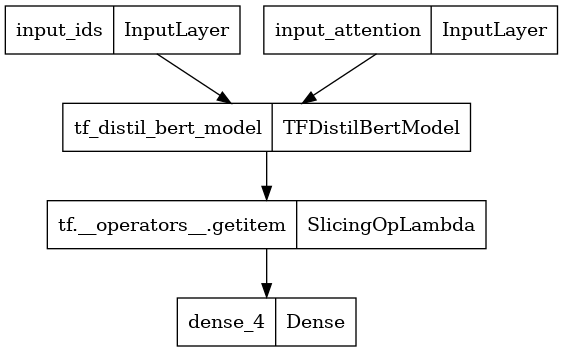

In [57]:
model = build_model(distilBERT)
tf.keras.utils.plot_model(model)

In [58]:
EPOCHS = 6
BATCH_SIZE = 64
NUM_STEPS = len(X_train) // BATCH_SIZE

# Train the model
train_history1 = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    steps_per_epoch = NUM_STEPS,
    validation_data = ([X_valid_ids, X_valid_attention], y_val),
    verbose=2
)

Epoch 1/6
101/101 - 13s - loss: 0.5724 - accuracy: 0.7212 - val_loss: 0.5162 - val_accuracy: 0.7461 - 13s/epoch - 129ms/step
Epoch 2/6
101/101 - 4s - loss: 0.5027 - accuracy: 0.7720 - val_loss: 0.4856 - val_accuracy: 0.7706 - 4s/epoch - 42ms/step
Epoch 3/6
101/101 - 4s - loss: 0.4777 - accuracy: 0.7798 - val_loss: 0.4760 - val_accuracy: 0.7855 - 4s/epoch - 41ms/step
Epoch 4/6
101/101 - 4s - loss: 0.4662 - accuracy: 0.7884 - val_loss: 0.4681 - val_accuracy: 0.7811 - 4s/epoch - 41ms/step
Epoch 5/6
101/101 - 4s - loss: 0.4678 - accuracy: 0.7893 - val_loss: 0.4633 - val_accuracy: 0.7828 - 4s/epoch - 42ms/step
Epoch 6/6
101/101 - 5s - loss: 0.4550 - accuracy: 0.7968 - val_loss: 0.4619 - val_accuracy: 0.7793 - 5s/epoch - 48ms/step


<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Dự đoán và đánh giá kết quả

In [59]:
yhat = np.where(model.predict({ 'input_ids' : X_test_ids,
                               'input_attention' : X_test_attention}) >=0.5,1,0)

102/102 [==============================] - 4s 24ms/step


In [60]:
print("accuracy = ", (perfect_score['target'] == yhat.reshape(-1)).sum() / len(yhat))

accuracy =  0.7775053631627337


In [61]:
perfect_score["target"] = yhat
perfect_score.to_csv("/kaggle/working/submission01.csv", index=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2175
           1       1.00      1.00      1.00      1088

    accuracy                           1.00      3263
   macro avg       1.00      1.00      1.00      3263
weighted avg       1.00      1.00      1.00      3263

Bidirectional LSTM Model Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2175
           1       1.00      1.00      1.00      1088

    accuracy                           1.00      3263
   macro avg       1.00      1.00      1.00      3263
weighted avg       1.00      1.00      1.00      3263



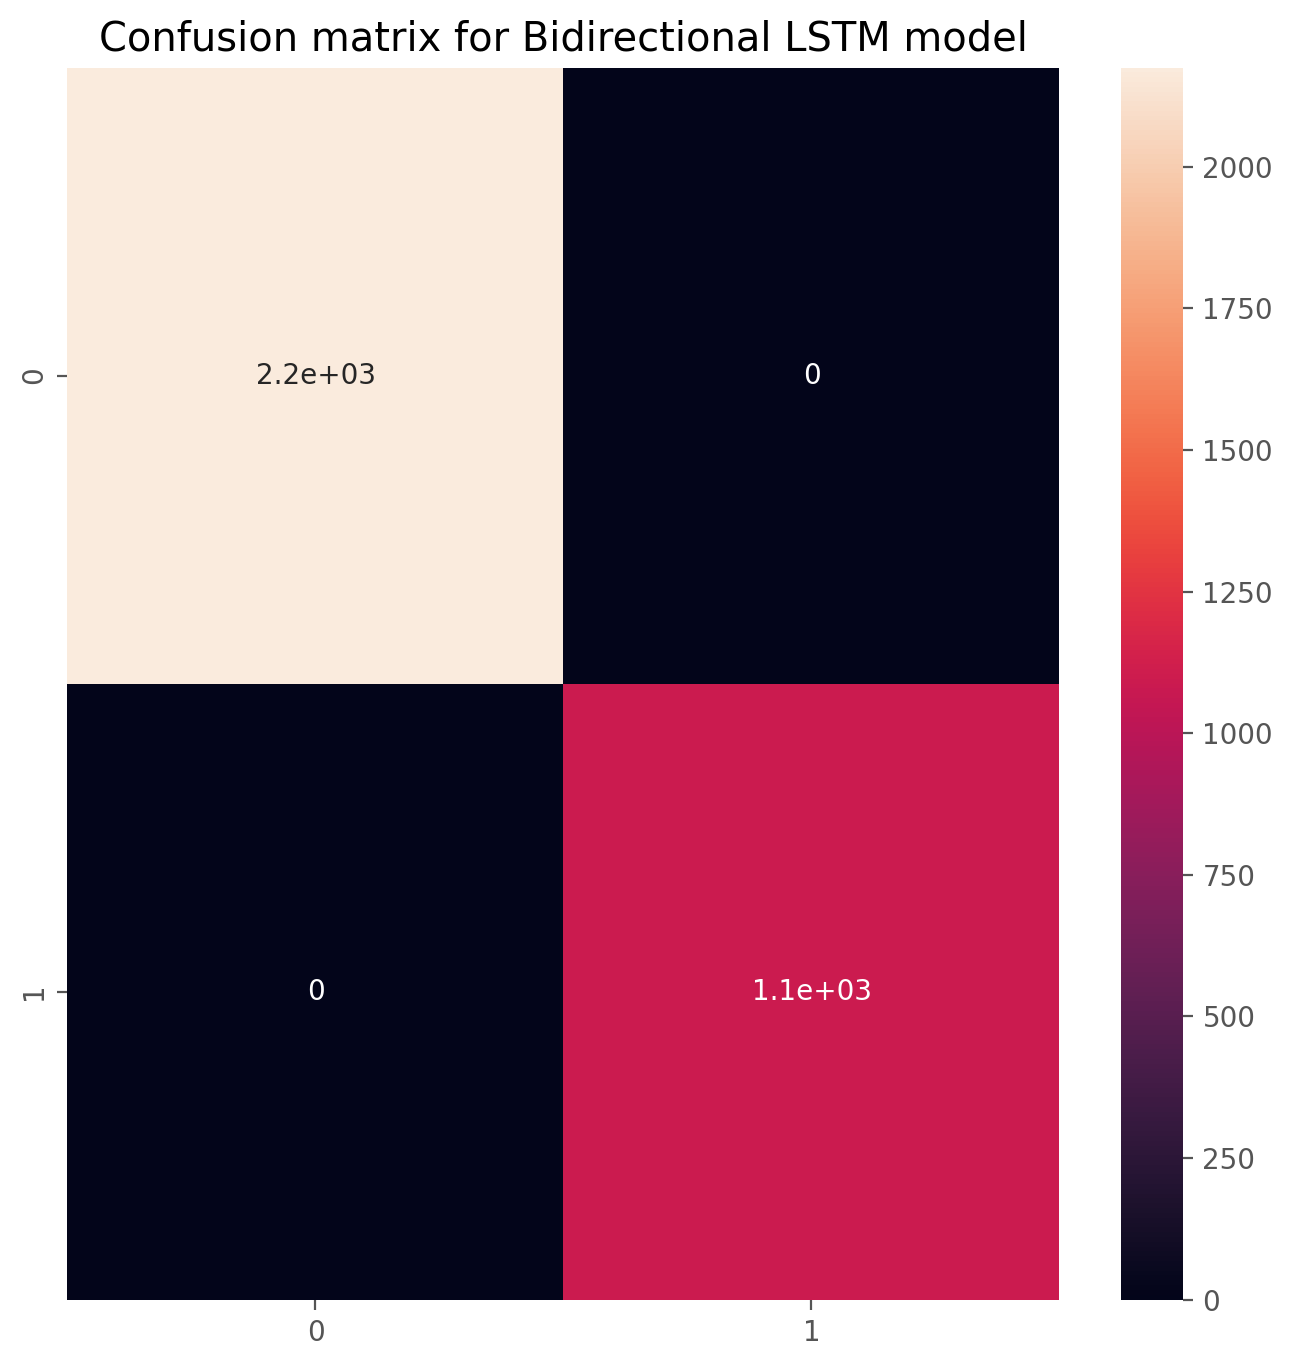

In [62]:
print(classification_report(perfect_score['target'],yhat))

# Getting The Accuracy
accuracy = accuracy_score(perfect_score["target"], yhat)

print("Bidirectional LSTM Model Accuracy : ", accuracy)


cm = confusion_matrix(perfect_score["target"], yhat)
fig, ax = plt.subplots(figsize = (8, 8), dpi=200)
sns.heatmap(cm, annot = True, ax=ax)
ax.set_title("Confusion matrix for Bidirectional LSTM model")

print(classification_report(perfect_score["target"], yhat, zero_division=0))

<a id="distil-BERT"></a>
<h2 style='color:#0084b4;font-size:150%'>4. Sequence BERT</h2>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Max len của các một tweet sau khi đã clean

In [63]:
train_df['text_clean'].apply(len).max()

20

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Ta sẽ tạo thêm một trường dữ liệu mới là `keyword_text` bằng cách kết hợp 2 features keyword và text.

In [64]:
def post_process(text):
    text = ' '.join(text)
    return text
train_df['text_clean'] = train_df['text_clean'].apply(post_process)
test_df['text_clean'] = test_df['text_clean'].apply(post_process)

In [65]:
train_df['keyword_text'] = train_df['keyword'].fillna("") + "." + train_df['text_clean']
test_df['keyword_text'] = test_df['keyword'].fillna("") + "." + test_df['text_clean']

In [66]:
train_df[train_df['keyword'].notna()]

id  keyword                       location  \
31       48   ablaze                     Birmingham   
32       49   ablaze  Est. September 2012 - Bristol   
33       50   ablaze                         AFRICA   
34       52   ablaze               Philadelphia, PA   
35       53   ablaze                     London, UK   
...     ...      ...                            ...   
7578  10830  wrecked                            NaN   
7579  10831  wrecked              Vancouver, Canada   
7580  10832  wrecked                        London    
7581  10833  wrecked                        Lincoln   
7582  10834  wrecked                            NaN   

                                                                                                     text  \
31                                                @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C   
32                                    We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw   
33                     #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi   
34                                                                     Crying out for more! Set me ablaze   
35                           On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N   
...                                                                                                   ...   
7578                                                     @jt_ruff23 @cameronhacker and I wrecked you both   
7579  Three days off from work and they've pretty much all been wrecked hahaha shoutout to my family f...   
7580        #FX #forex #trading Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/7enNulLKzM   
7581  @engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oM...   
7582                     Cramer: Iger's 3 words that wrecked Disney's stock - CNBC http://t.co/N6RBnHMTD4   

      target  \
31         1   
32         0   
33         1   
34         0   
35         0   
...      ...   
7578       0   
7579       0   
7580       0   
7581       0   
7582       0   

                                                                                             text_cleaned  \
31                                                                     @ bbcmtd Wholesale Markets ablaze    
32                                                    We always try to bring the heavy .   # metal  # RT    
33                                    # AFRICANBAZE :  Breaking news : Nigeria flag set ablaze in Aba .     
34                                                                   Crying out for more !  Set me ablaze   
35                                                 On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE    
...                                                                                                   ...   
7578                                                  @ jt_ruff23  @ cameronhacker and I wrecked you both   
7579  Three days off from work and they have pretty much all been wrecked hahaha shoutout to my family...   
7580                   # FX  # forex  # trading Cramer :  Iger ' s 3 words that wrecked Disney ' s stock    
7581              @ engineshed Great atmosphere at the British Lion gig tonight .  Hearing is wrecked .     
7582                                   Cramer :  Iger ' s 3 words that wrecked Disney ' s stock  -  CNBC    

      target_relabeled  \
31                   1   
32                   0   
33                   1   
34                   0   
35                   0   
...                ...   
7578                 0   
7579                 0   
7580                 0   
7581                 0   
7582                 0   

                                                            text_clean  \
31                                     bbcmtd wholesale markets ablaze   
32                                                   bring heavy metal   
33

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Tiếp theo, ta sẽ split data theo 2 nhãn là non-disaster và disaster, từ đó chia các tập train, validation 

In [67]:
# Split according to label
df_real_train = train_df[train_df['target'] == 0]
df_fake_train = train_df[train_df['target'] == 1]

# Train-valid split
df_real_train, df_real_valid = train_test_split(df_real_train, train_size = 0.8, random_state = 1)
df_fake_train, df_fake_valid = train_test_split(df_fake_train, train_size = 0.8, random_state = 1)

# Concatenate splits of different labels
train = pd.concat([df_real_train, df_fake_train], ignore_index=True, sort=False)
valid = pd.concat([df_real_valid, df_fake_valid], ignore_index=True, sort=False)

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- Lưu processed file lại

In [68]:
train.to_csv('/kaggle/working/train.csv', index=False)
valid.to_csv('/kaggle/working/valid.csv', index=False)
test_df.to_csv('/kaggle/working/test.csv', index=False)

<div id="reference" style="color:white;
            display:fill;
            border-radius:15px;
            background-color:#1D9BF0;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Reference
    </h3>
</div>

<a href="#TOC" class="scroll-to-top-link">
  <button type="button" class="btn btn-primary btn-sm scroll-to-top-btn d-inline-flex" style="border-width: 0px">
      <i class="fas fa-arrow-up"></i>
      Scroll to top
  </button>
</a>

<div style="border-radius:10px;
            padding: 15px;
            background-color:#c0deed;">

- https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert
- https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove
- https://github.com/wutonytt/Fake-News-Detection